In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Data Sets/smart_home_energy_dataset.csv'))
df

,num_residents,num_appliances,avg_usage_hours_per_day,room_temp_celsius,energy_cost_per_unit,energy_consumption_kWh,monthly_energy_cost
0,4,12,8.75,15.9,0.15,635.82,95.37
1,5,13,4.00,26.7,0.14,275.85,38.62
2,3,8,4.77,21.1,0.13,365.33,47.49
3,5,5,8.73,22.0,0.12,418.01,50.16
4,5,18,4.19,20.0,0.19,351.83,66.85
...,...,...,...,...,...,...,...
195,3,18,8.41,20.8,0.18,566.43,101.96
196,2,9,9.55,20.2,0.12,553.40,66.41
197,4,19,9.88,24.3,0.11,684.90,75.34
198,3,7,7.90,25.3,0.13,488.95,63.56


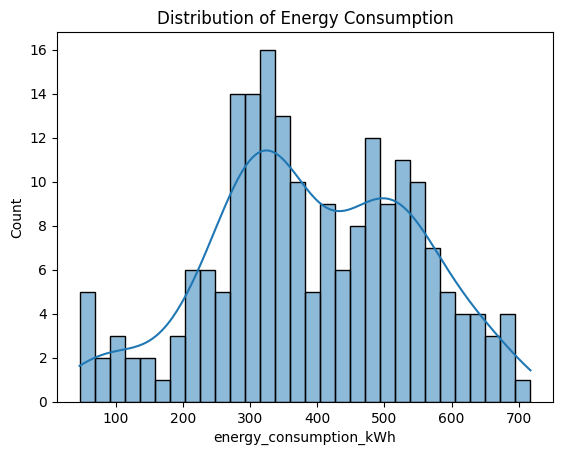

In [27]:
sns.histplot(data=df, x='energy_consumption_kWh', kde=True, bins=30)
plt.title("Distribution of Energy Consumption")
plt.show()

In [28]:
X = df[['energy_consumption_kWh', 'num_residents', 'num_appliances', 'avg_usage_hours_per_day', 'room_temp_celsius', 'energy_cost_per_unit']]
y = df['monthly_energy_cost']

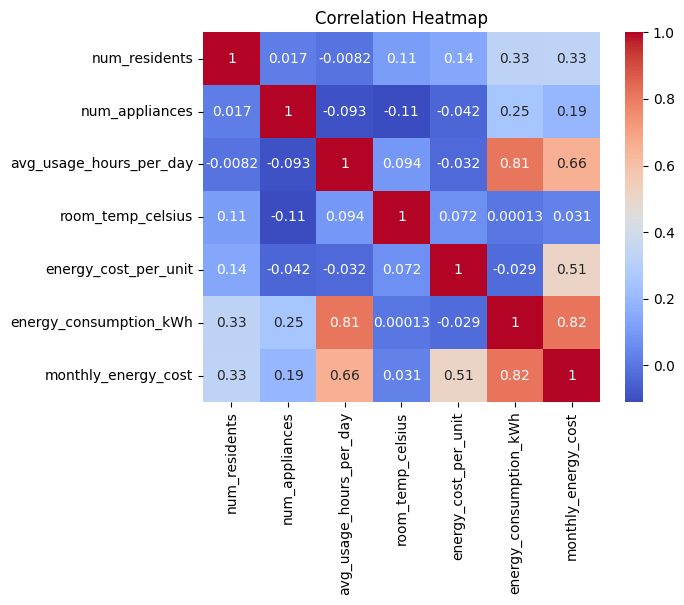

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **LR Implementation from Sklearn:**

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
model.predict(X_test)

array([ 67.96201548,  53.10962558,  50.23689225,  29.37810583,
        45.48619568,  60.87809229,  54.17071251,  87.62126759,
        53.17786417,  14.22583864,  89.95066031,  75.15541996,
        89.17894585,  94.5860664 ,  94.88842744,  21.5233419 ,
        83.08841303,  73.44347425,  64.34493422,  38.98348211,
        59.659915  ,  82.12107454,  14.01441563,  36.11674983,
        52.71272582,  55.64767432,  60.16079841,  54.51418831,
        59.44082458,  85.13940451, 102.57052034,  60.01811043,
        89.36119506,  80.86316026,  66.93063683,  36.06708773,
        72.9838976 ,  45.25228706,  28.95766575,  66.82253755])

In [37]:
r2_score(y_test, y_pred)

0.9523821610900949

In [ ]:
# Create a DataFrame from the list with appropriate column names
input_data = pd.DataFrame([[635.82, 4, 12,	8.75,	15.9,	0.15]], columns=['energy_consumption_kWh', 'num_residents', 'num_appliances', 'avg_usage_hours_per_day', 'room_temp_celsius', 'energy_cost_per_unit'])

# Make the prediction using the DataFrame
model.predict(input_data)

# **Manual Implementation:**

In [ ]:
class LinearRegression:
    def __init__(self, m=None, lr=0.000001, epochs=10000):
        self.m = m
        self.lr = lr
        self.epochs = epochs

    def cost(self, m, X, y):
        y_pred = X.dot(m)
        cost = np.mean((y_pred - y) ** 2)
        assert not np.isnan(cost).any(), "Cost is NaN"
        return cost

    def gradient_descent(self, m, X, y, lr, epochs):
        cost_history = []
        n = len(y)
        X_np = X.values
        y_np = y.values.reshape(-1, 1)

        for i in range(self.epochs):
            pred = X_np.dot(m)
            error = pred - y_np
            gradient = X_np.T.dot(error) / n

            # Clip gradients
            np.clip(gradient, -1e3, 1e3, out=gradient)

            m -= lr * gradient

            cost = self.cost(m, X, y)
            cost_history.append(cost)

        return m, cost_history

    def fit(self, X, y):
        assert not np.isnan(X.values).any(), "X contains NaN"
        assert not np.isnan(y.values).any(), "y contains NaN"

        if self.m is None:
            self.m = np.ones((X.shape[1], 1))

        m, cost_history = self.gradient_descent(self.m, X, y, self.lr, self.epochs)
        self.m = m
        self.cost_history = cost_history
        return m, cost_history

    def predict(self, X):
        return X.dot(self.m)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
print("Train R2:", r2_score(y_train, model.predict(X_train)))
print("Test R2:", r2_score(y_test, model.predict(X_test)))

In [ ]:
# Create a DataFrame from the list with appropriate column names
input_data = pd.DataFrame([[635.82, 4, 12,	8.75,	15.9,	0.15]], columns=['energy_consumption_kWh', 'num_residents', 'num_appliances', 'avg_usage_hours_per_day', 'room_temp_celsius', 'energy_cost_per_unit'])

# Make the prediction using the DataFrame
model.predict(input_data)

**Model is Clearly on Underfitting, So let us choose a complex model**

MSE (Polynomial Regression): 0.1704358352787109
R2 Score (Polynomial Regression): 0.9997436949864549


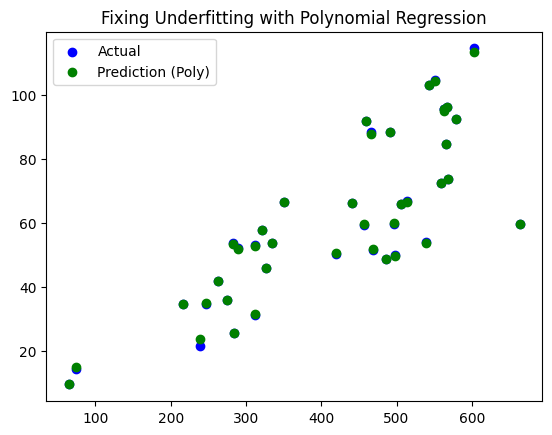

In [39]:
# Polynomial Regression (degree 4)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
model.fit(X_train, y_train)
y_pred_poly = model.predict(X_test)

print("MSE (Polynomial Regression):", mean_squared_error(y_test, y_pred_poly))
print("R2 Score (Polynomial Regression):", r2_score(y_test, y_pred_poly))
# Plot
plt.scatter(X_test['energy_consumption_kWh'], y_test, color="blue", label="Actual")
plt.scatter(X_test['energy_consumption_kWh'], y_pred_poly, color="green", label="Prediction (Poly)")
plt.title("Fixing Underfitting with Polynomial Regression")
plt.legend()
plt.show()